In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

lat0,lat1 = -5,5
lon0,lon1 = 143,153
h = "h1"

In [2]:
feb = [ "02-%02d"%(i+1) for i in range(28) ]
dates = ["01-30", "01-31"]+ feb
ds = xr.open_dataset(ap.test_data_file_name(h, dates[0])).drop(["P3_input_dim","P3_output_dim","ilev","lev","swband","lwband", "slat","slon"])

for date in dates[1:]:
    file = ap.test_data_file_name(h, date)
    print(file)
    ds_1 = xr.open_dataset(file).drop(["P3_input_dim","P3_output_dim","ilev","lev","swband","lwband", "slat","slon"])
    ds = xr.combine_by_coords([ds, ds_1], combine_attrs="drop")
    # print(ds)




/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-01-31-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-01-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-02-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-03-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-04-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-05-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-06-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-07-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne

In [3]:
ds

<xarray.Dataset>
Dimensions:       (ilev: 129, lat: 256, lev: 128, lon: 512, nbnd: 2, slat: 255, time: 2880)
Coordinates:
  * lat           (lat) float64 -90.0 -89.29 -88.59 -87.88 ... 88.59 89.29 90.0
  * lon           (lon) float64 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
  * time          (time) object 2020-01-30 00:00:00 ... 2020-02-28 23:45:00
Dimensions without coordinates: ilev, lev, nbnd, slat
Data variables:
    w_stag        (time, slat) float64 7.589e-05 0.0002277 ... 7.589e-05
    lat_bnds      (time, lat, nbnd) float64 -90.0 -89.65 -89.65 ... 89.65 90.0
    lon_bnds      (time, lon, nbnd) float64 359.6 0.3516 0.3516 ... 358.9 359.6
    gw            (time, lat) float64 1.897e-05 0.0001518 ... 1.897e-05
    area          (time, lat, lon) float64 2.328e-07 2.328e-07 ... 2.328e-07
    LHFLX         (time, lat, lon) float32 0.43040887 0.4238722 ... 0.2763128
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    PRECSL        (time, lat, lon) float32 1.4374128e-12 ... 1.32724e-10
    PRECT         (time, lat, lon) float32 1.4374128e-12 ... 1.32724e-10
    PS            (time, lat, lon) float32 69581.16 69544.02 ... 103408.836
    QREFHT        (time, lat, lon) float32 0.00048300344 ... 0.000105942796
    SHFLX         (time, lat, lon) float32 -3.2383327 -3.3745055 ... -18.467049
    TAUX          (time, lat, lon) float32 0.011053038 ... -0.08519985
    TAUY          (time, lat, lon) float32 0.03343707 0.03479518 ... 0.19237633
    TREFHT        (time, lat, lon) float32 247.18257 247.1565 ... 236.20732
    TS            (time, lat, lon) float32 246.0907 246.05026 ... 235.60321
    WINDSPD_10M   (time, lat, lon) float32 4.159118 4.164448 ... 9.28277
    ch4vmr        (time) float64 1.808e-06 1.808e-06 ... 1.808e-06 1.808e-06
    co2vmr        (time) float64 0.000379 0.000379 ... 0.000379 0.000379
    date          (time) int32 20200130 20200130 20200130 ... 20200228 20200228
    date_written  (time) |S8 b'11/30/20' b'11/30/20' ... b'12/12/20' b'12/12/20'
    datesec       (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    f11vmr        (time) float64 7.688e-10 7.688e-10 ... 7.688e-10 7.688e-10
    f12vmr        (time) float64 5.313e-10 5.313e-10 ... 5.313e-10 5.313e-10
    hyai          (time, ilev) float64 0.002255 0.002905 ... 9.235e-05 0.0
    hyam          (time, lev) float64 0.00258 0.00323 ... 0.0001556 4.618e-05
    hybi          (time, ilev) float64 0.0 0.0 0.0 0.0 ... 0.9927 0.9969 1.0
    hybm          (time, lev) float64 0.0 0.0 0.0 0.0 ... 0.9907 0.9948 0.9985
    mdt           (time) int32 75 75 75 75 75 75 75 75 ... 75 75 75 75 75 75 75
    n2ovmr        (time) float64 3.231e-07 3.231e-07 ... 3.231e-07 3.231e-07
    nbdate        (time) int32 20200120 20200120 20200120 ... 20200120 20200120
    nbsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndcur         (time) int32 10 10 10 10 10 10 10 10 ... 39 39 39 39 39 39 39
    nsbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nscur         (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    nsteph        (time) int32 11520 11532 11544 11556 ... 46044 46056 46068
    sol_tsi       (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    time_bnds     (time, nbnd) object 2020-01-29 23:45:00 ... 2020-02-28 23:4...
    time_written  (time) |S8 b'14:40:11' b'15:11:46' ... b'05:52:39' b'05:55:14'

In [4]:

ds = ds.sel(lat=slice(lat0, lat1)).sel(lon=slice(lon0,lon1))
ds

<xarray.Dataset>
Dimensions:       (ilev: 129, lat: 14, lev: 128, lon: 14, nbnd: 2, slat: 255, time: 2880)
Coordinates:
  * lat           (lat) float64 -4.588 -3.882 -3.176 ... 3.176 3.882 4.588
  * lon           (lon) float64 143.4 144.1 144.8 145.5 ... 151.2 151.9 152.6
  * time          (time) object 2020-01-30 00:00:00 ... 2020-02-28 23:45:00
Dimensions without coordinates: ilev, lev, nbnd, slat
Data variables:
    w_stag        (time, slat) float64 7.589e-05 0.0002277 ... 7.589e-05
    lat_bnds      (time, lat, nbnd) float64 -4.941 -4.235 -4.235 ... 4.235 4.941
    lon_bnds      (time, lon, nbnd) float64 143.1 143.8 143.8 ... 152.2 152.9
    gw            (time, lat) float64 0.01228 0.01229 0.0123 ... 0.01229 0.01228
    area          (time, lat, lon) float64 0.0001507 0.0001507 ... 0.0001507
    LHFLX         (time, lat, lon) float32 263.30338 290.50156 ... 212.6996
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    PRECSL        (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PRECT         (time, lat, lon) float32 2.6930298e-17 ... 2.9966012e-07
    PS            (time, lat, lon) float32 97803.836 99088.17 ... 100881.61
    QREFHT        (time, lat, lon) float32 0.017464414 ... 0.019827724
    SHFLX         (time, lat, lon) float32 256.67532 281.9278 ... 31.236408
    TAUX          (time, lat, lon) float32 -0.14919123 ... 0.10191936
    TAUY          (time, lat, lon) float32 0.25018364 0.17546843 ... 0.034894478
    TREFHT        (time, lat, lon) float32 301.40668 302.52533 ... 300.5961
    TS            (time, lat, lon) float32 303.2754 304.31293 ... 302.9491
    WINDSPD_10M   (time, lat, lon) float32 2.3446453 2.4957721 ... 8.949416
    ch4vmr        (time) float64 1.808e-06 1.808e-06 ... 1.808e-06 1.808e-06
    co2vmr        (time) float64 0.000379 0.000379 ... 0.000379 0.000379
    date          (time) int32 20200130 20200130 20200130 ... 20200228 20200228
    date_written  (time) |S8 b'11/30/20' b'11/30/20' ... b'12/12/20' b'12/12/20'
    datesec       (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    f11vmr        (time) float64 7.688e-10 7.688e-10 ... 7.688e-10 7.688e-10
    f12vmr        (time) float64 5.313e-10 5.313e-10 ... 5.313e-10 5.313e-10
    hyai          (time, ilev) float64 0.002255 0.002905 ... 9.235e-05 0.0
    hyam          (time, lev) float64 0.00258 0.00323 ... 0.0001556 4.618e-05
    hybi          (time, ilev) float64 0.0 0.0 0.0 0.0 ... 0.9927 0.9969 1.0
    hybm          (time, lev) float64 0.0 0.0 0.0 0.0 ... 0.9907 0.9948 0.9985
    mdt           (time) int32 75 75 75 75 75 75 75 75 ... 75 75 75 75 75 75 75
    n2ovmr        (time) float64 3.231e-07 3.231e-07 ... 3.231e-07 3.231e-07
    nbdate        (time) int32 20200120 20200120 20200120 ... 20200120 20200120
    nbsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndcur         (time) int32 10 10 10 10 10 10 10 10 ... 39 39 39 39 39 39 39
    nsbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nscur         (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    nsteph        (time) int32 11520 11532 11544 11556 ... 46044 46056 46068
    sol_tsi       (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    time_bnds     (time, nbnd) object 2020-01-29 23:45:00 ... 2020-02-28 23:4...
    time_written  (time) |S8 b'14:40:11' b'15:11:46' ... b'05:52:39' b'05:55:14'

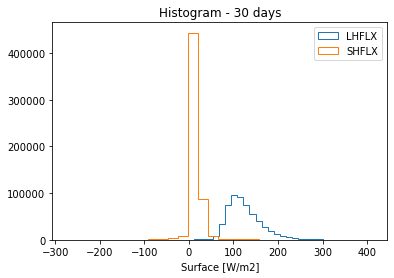

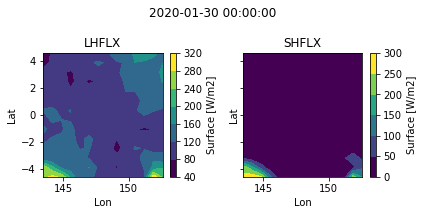

In [24]:
#plotting
fig, ax = plt.subplots(1,1,figsize=(6,4))
log=False
t=0

## h0
# bins=np.linspace(0.01,1,20)
# vars = ["CLDTOT","CLDHGH","CLDMED","CLDLOW"]
# bins = np.linspace(-5,1,25)
# vars = ["TMCLDICE", "TMCLDLIQ", "TMCLDRIM", "TMRAINQM"]
# vmin, vmax = -5, 1
# vars = ["CAPE", "CIN"]
# bins=30

## h1
vars = ["LHFLX", "SHFLX"]
# vars = ["PRECSL", "PRECT"]
# vars = ["QREFHT"]
# vars = ["TREFHT"]
# vars = ["TAUX", "TAUY"]
# vars =  ["WINDSPD_10M"]
# vars = ["PS"]

bins=30

#histogram
for v in vars:
    if log:
        np.log10(ds[v]).plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
    else:
        ds[v].plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
plt.legend()
plt.title("Histogram - 30 days")
plt.show()

# plot snapshot on latlon
fig, ax = plt.subplots(1, len(vars), figsize=(3*len(vars),3), sharey=True, sharex=True)
for i,axi in enumerate(ax):
    if log:
        np.log10(ds[vars[i]][t]).plot.contourf(ax=ax[i], vmin=vmin, vmax=vmax)
    else:
        ds[vars[i]][t].plot.contourf(ax=ax[i])
    axi.set_ylabel("Lat")
    axi.set_xlabel("Lon")
    axi.set_title(vars[i])
fig.suptitle(ds.time[t].values)
plt.tight_layout()
plt.show()